# MVP Comunidad Valenciana

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import datetime as dt
from tools import dataoveriew, plot_roc_curve, plot_confusion_matrix
from datetime import datetime
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

pd.options.display.max_columns = None

%matplotlib inline

In [3]:
data = pd.read_excel('../data/portfolio_com_valencia.xlsx')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,38.060900,-0.950240,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
1,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,39.588239,-0.502772,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0
2,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,38.154230,-0.749640,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
3,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,38.212568,-0.682989,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,10
4,2015-01-07,1833687,Normal,SDVFAST,Este,Alicante,3010,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1986-06-18,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,2000,12,TSE,2018-03-31,1,38.366849,-0.487184,N-Tienda- negocio al publico,Financiado,A 0,0+(36*10),0,360,10,0,1


In [4]:
data.shape

(52031, 30)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52031 entries, 0 to 52030
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Installation Date       52031 non-null  datetime64[ns]
 1   Installation Number     52031 non-null  int64         
 2   Client Type             52031 non-null  object        
 3   Panel                   52031 non-null  object        
 4   Territorial             52031 non-null  object        
 5   Provincia               52031 non-null  object        
 6   Zip                     52031 non-null  int64         
 7   Gender                  52031 non-null  object        
 8   Nationality             52031 non-null  object        
 9   Country Of Birth        52031 non-null  object        
 10  Born Date               51810 non-null  datetime64[ns]
 11  Housing Type            52031 non-null  object        
 12  Labor Situation         52031 non-null  object

In [6]:
data.isnull().sum()

Installation Date           0
Installation Number         0
Client Type                 0
Panel                       0
Territorial                 0
Provincia                   0
Zip                         0
Gender                      0
Nationality                 0
Country Of Birth            0
Born Date                 221
Housing Type                0
Labor Situation             0
Marital Status              0
Income Amount               0
Number Pay                  0
Price List                  0
Monitoring Status Date      0
Monitoring Status           0
Latitude                    0
Longitude                   0
Tipo Instalacion            0
Financiado                  0
Rango Kit                   0
Resumen Precio              0
Kit Contado                 0
Kit Total                   0
Kit Mensualidad             0
Quejas                      0
MT                          0
dtype: int64

In [7]:
dataoveriew(data, 'Overiew of the dataset')

Overiew of the dataset:

Número de Filas: 52031

Número de Columnas: 30

Columnas:

['Installation Date', 'Installation Number', 'Client Type', 'Panel', 'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality', 'Country Of Birth', 'Born Date', 'Housing Type', 'Labor Situation', 'Marital Status', 'Income Amount', 'Number Pay', 'Price List', 'Monitoring Status Date', 'Monitoring Status', 'Latitude', 'Longitude', 'Tipo Instalacion', 'Financiado', 'Rango Kit', 'Resumen Precio', 'Kit Contado', 'Kit Total', 'Kit Mensualidad', 'Quejas', 'MT']

Valores nulos: 221

Valores únicos:

Installation Date          2116
Installation Number       51994
Client Type                   2
Panel                         2
Territorial                   1
Provincia                     3
Zip                         619
Gender                        2
Nationality                  11
Country Of Birth            143
Born Date                 19502
Housing Type                  5
Labor Situation               8
Ma

In [8]:
data['Installation Number'] = data['Installation Number'].astype('str')
data['Zip'] = data['Zip'].astype('str')
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,38.060900,-0.950240,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
1,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,39.588239,-0.502772,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0
2,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,38.154230,-0.749640,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
3,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,38.212568,-0.682989,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,10
4,2015-01-07,1833687,Normal,SDVFAST,Este,Alicante,3010,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1986-06-18,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,2000,12,TSE,2018-03-31,1,38.366849,-0.487184,N-Tienda- negocio al publico,Financiado,A 0,0+(36*10),0,360,10,0,1


In [9]:
data.describe()

,Income Amount,Number Pay,Monitoring Status,Latitude,Longitude,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
count,5.203100e+04,52031.000000,52031.000000,52031.000000,52031.000000,52031.000000,52031.000000,52031.000000,52031.000000,52031.000000
mean,2.292366e+04,12.913302,0.232304,39.009911,-0.397752,101.786339,475.892276,9.944917,0.331264,0.905595
std,2.911734e+06,1.064677,0.422306,0.675406,0.305567,99.974874,110.801645,1.547792,0.979536,3.439481
min,1.000000e+00,12.000000,0.000000,28.095606,-17.338946,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.200000e+03,12.000000,0.000000,38.382500,-0.583249,49.000000,409.000000,10.000000,0.000000,0.000000
50%,1.500000e+03,12.000000,0.000000,38.996309,-0.424169,79.000000,459.000000,10.000000,0.000000,0.000000
75%,2.000000e+03,14.000000,0.000000,39.495476,-0.220963,199.000000,559.000000,10.000000,0.000000,0.000000
max,6.464980e+08,16.000000,1.000000,41.776807,2.243188,999.000000,4529.000000,99.000000,28.000000,51.000000


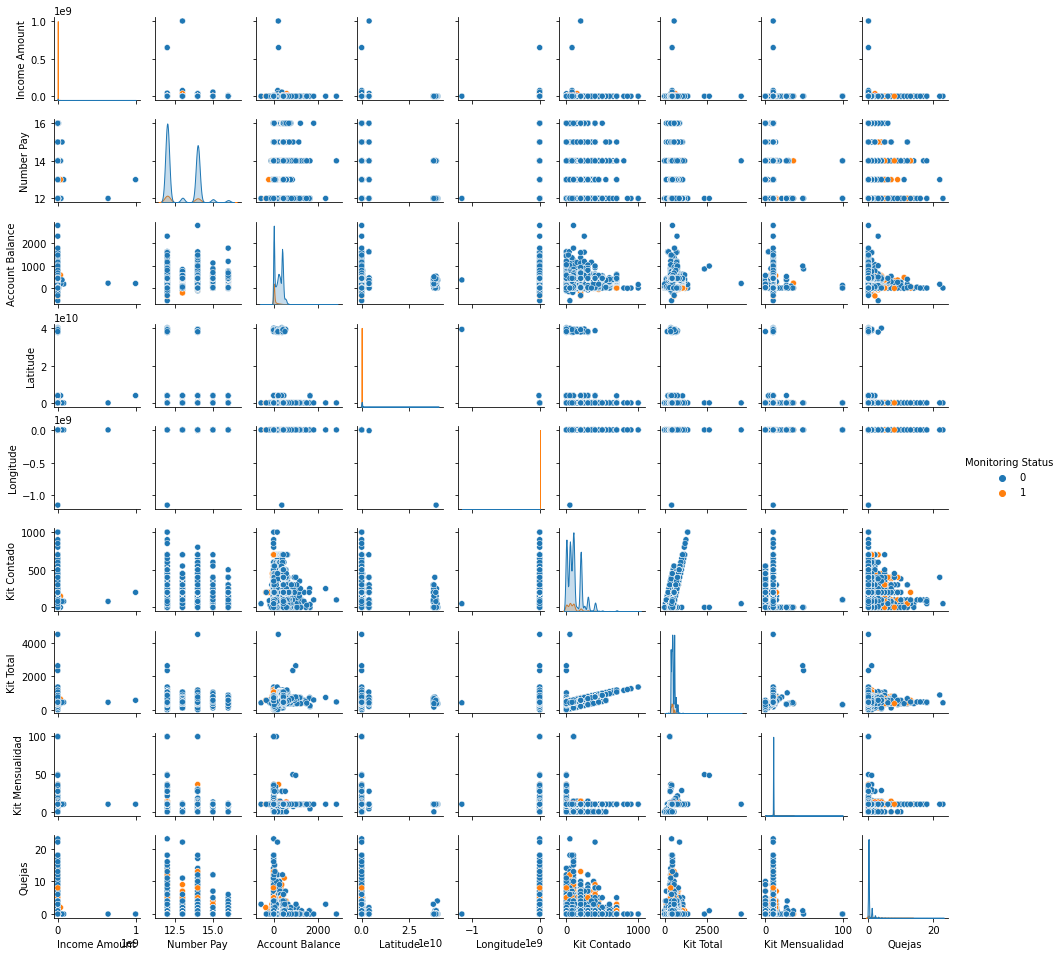

In [9]:
# Don´t do this!!!!

sns.pairplot(data = data, diag_kind = 'kde', hue = 'Monitoring Status', height = 1.5);

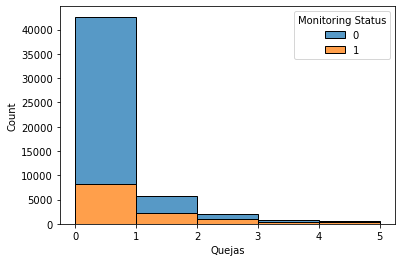

In [10]:
sns.histplot(data = data, x="Quejas", hue = 'Monitoring Status', multiple="stack",
             binwidth=1,  binrange = (0,5));

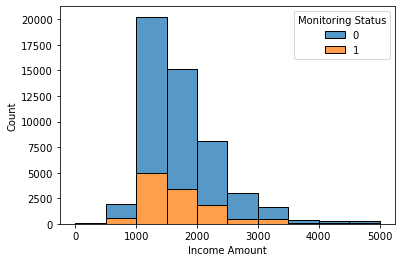

In [11]:
sns.histplot(data = data, x="Income Amount", hue = 'Monitoring Status', multiple="stack", binrange = (0,5000), bins = 10);

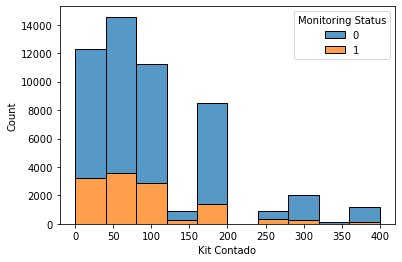

In [12]:
sns.histplot(data = data, x="Kit Contado", hue = 'Monitoring Status', multiple="stack", binrange = (0,400), bins = 10);

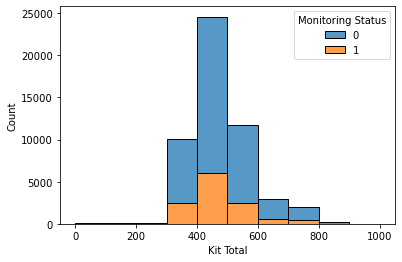

In [13]:
sns.histplot(data = data, x="Kit Total", hue = 'Monitoring Status', multiple="stack", binrange = (0,1000), bins = 10);

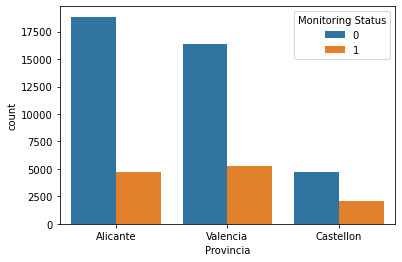

In [14]:
sns.countplot(x="Provincia", hue = 'Monitoring Status',data = data);

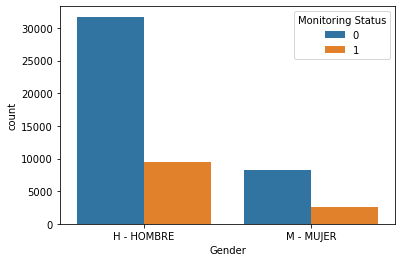

In [15]:
sns.countplot(x="Gender", hue = 'Monitoring Status',data = data);

In [16]:
corr = data.corr()
corr

,Income Amount,Number Pay,Monitoring Status,Latitude,Longitude,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
Income Amount,1.000000,-0.002291,-0.002662,0.004429,0.000914,-0.000871,-0.001320,0.000240,-0.001898,-0.001398
Number Pay,-0.002291,1.000000,-0.055873,-0.003305,-0.049159,0.011894,-0.012608,-0.002058,-0.012673,-0.029249
Monitoring Status,-0.002662,-0.055873,1.000000,0.064950,0.020366,-0.090298,-0.046115,0.003257,0.181388,0.247665
Latitude,0.004429,-0.003305,0.064950,1.000000,0.534211,-0.141861,-0.112719,0.007626,0.061868,0.018228
Longitude,0.000914,-0.049159,0.020366,0.534211,1.000000,-0.030108,-0.024098,0.002558,0.016044,0.021273
Kit Contado,-0.000871,0.011894,-0.090298,-0.141861,-0.030108,1.000000,0.854246,-0.074237,-0.032187,-0.021475
Kit Total,-0.001320,-0.012608,-0.046115,-0.112719,-0.024098,0.854246,1.000000,0.105509,-0.045416,-0.015000
Kit Mensualidad,0.000240,-0.002058,0.003257,0.007626,0.002558,-0.074237,0.105509,1.000000,-0.010428,-0.006992
Quejas,-0.001898,-0.012673,0.181388,0.061868,0.016044,-0.032187,-0.045416,-0.010428,1.000000,0.051663
MT,-0.001398,-0.029249,0.247665,0.018228,0.021273,-0.021475,-0.015000,-0.006992,0.051663,1.000000


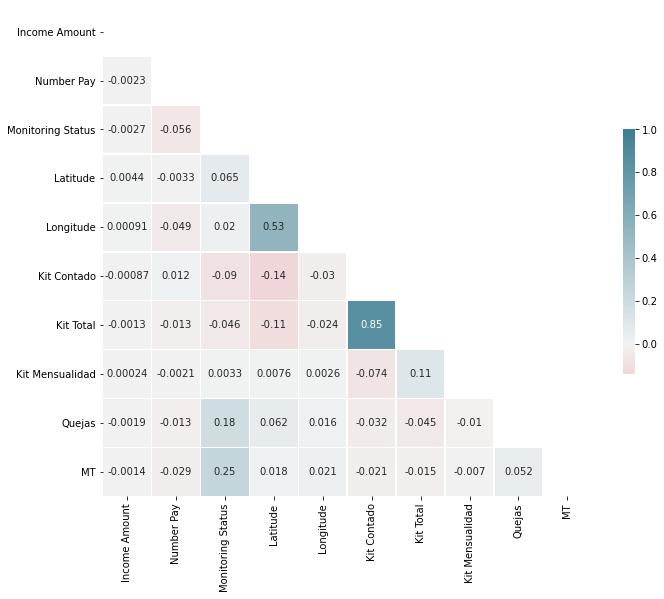

In [17]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

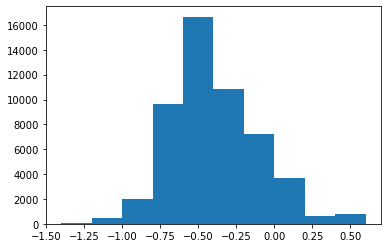

In [18]:
plt.hist(data['Longitude'], range=(-1.4, 0.6));

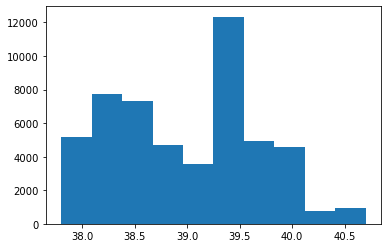

In [19]:
plt.hist(data['Latitude'], range=(37.8, 40.7));

(-1.4, 0.6)

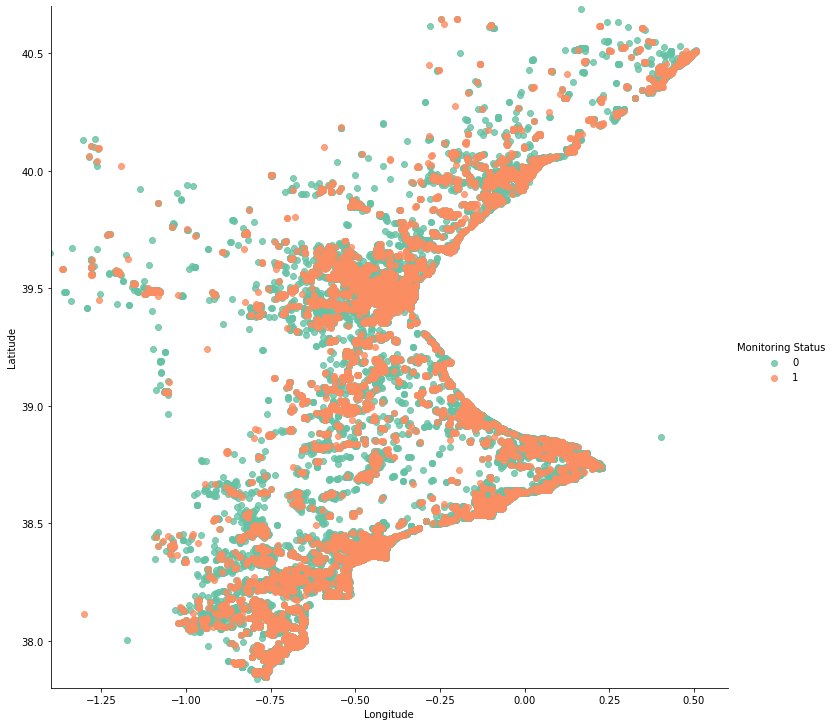

In [20]:
sns.lmplot(data=data, x = 'Longitude', y = 'Latitude', hue = 'Monitoring Status', 
           fit_reg=False,  height=10, palette="Set2")
plt.ylim(37.8, 40.7)
plt.xlim(-1.4, 0.6)

In [21]:
# Using Activo and Baja for 0 and 1    
class_names = ['Activo','Baja']

In [22]:
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,38.060900,-0.950240,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
1,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,39.588239,-0.502772,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0
2,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,38.154230,-0.749640,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
3,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,38.212568,-0.682989,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,10
4,2015-01-07,1833687,Normal,SDVFAST,Este,Alicante,3010,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1986-06-18,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,2000,12,TSE,2018-03-31,1,38.366849,-0.487184,N-Tienda- negocio al publico,Financiado,A 0,0+(36*10),0,360,10,0,1


## Baseline: Sin variables categóricas

In [23]:
data_filtered = data[['Quejas', 'MT', 'Monitoring Status']]
data_filtered.head()

,Quejas,MT,Monitoring Status
0,1,0,1
1,1,0,1
2,1,0,0
3,0,10,1
4,0,1,1


In [24]:
X = data_filtered.iloc[:, :-1]
y = data_filtered.iloc[:, 2]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Regresión Logística

In [26]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, class_weight="balanced")
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [27]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      7989
           1       0.46      0.47      0.46      2418

    accuracy                           0.75     10407
   macro avg       0.65      0.65      0.65     10407
weighted avg       0.75      0.75      0.75     10407



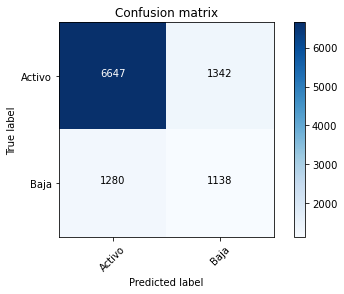

In [28]:
print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.67


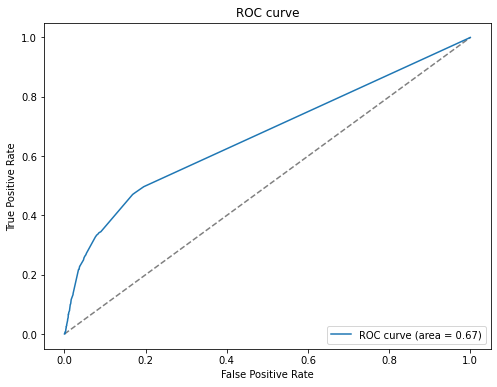

In [29]:
plot_roc_curve(classifier, X_test, y_test)

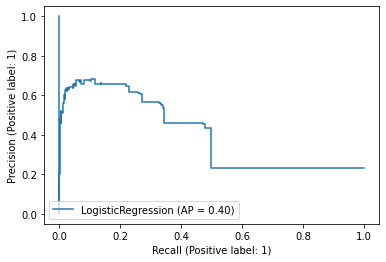

In [30]:
plot_precision_recall_curve(classifier, X_test, y_test)

## Feature engineering

- Edad en Años
- Rango de Income Amount
- Días Activo normalizado
- Normalizado de 'Quejas' y 'MT
- Normalizado de Latitud y Longitud ??

Rangos de Edad:

In [31]:
data.columns

Index(['Installation Date', 'Installation Number', 'Client Type', 'Panel',
       'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality',
       'Country Of Birth', 'Born Date', 'Housing Type', 'Labor Situation',
       'Marital Status', 'Income Amount', 'Number Pay', 'Price List',
       'Monitoring Status Date', 'Monitoring Status', 'Latitude', 'Longitude',
       'Tipo Instalacion', 'Financiado', 'Rango Kit', 'Resumen Precio',
       'Kit Contado', 'Kit Total', 'Kit Mensualidad', 'Quejas', 'MT'],
      dtype='object')

In [32]:
data['Born Date'].isnull().sum()

221

In [33]:
data['Born Date'] = data['Born Date'].replace(np.nan, datetime(1970, 1, 1))

data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,38.060900,-0.950240,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
1,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,39.588239,-0.502772,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0
2,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,38.154230,-0.749640,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
3,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,38.212568,-0.682989,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,10
4,2015-01-07,1833687,Normal,SDVFAST,Este,Alicante,3010,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1986-06-18,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,2000,12,TSE,2018-03-31,1,38.366849,-0.487184,N-Tienda- negocio al publico,Financiado,A 0,0+(36*10),0,360,10,0,1


In [34]:
data['Born Date'].isnull().sum()

0

In [35]:
# Edad actual si OP y edad cuando se dio de baja si BAJA

data['Edad'] = 0
fecha = datetime(2021, 1, 19)

for i in range(len(data['Born Date'])):
    if data.loc[i, 'Monitoring Status'] == 0:
        data.loc[i,'Edad'] = ((fecha - data.loc[i,'Born Date']).days)/365
    else:
        data.loc[i,'Edad'] = ((data.loc[i,'Monitoring Status Date'] - data.loc[i,'Born Date']).days)/365
                        
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT,Edad
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,38.060900,-0.950240,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164
1,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,39.588239,-0.502772,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562
2,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,38.154230,-0.749640,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521
3,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,38.212568,-0.682989,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,10,28.641096
4,2015-01-07,1833687,Normal,SDVFAST,Este,Alicante,3010,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1986-06-18,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,2000,12,TSE,2018-03-31,1,38.366849,-0.487184,N-Tienda- negocio al publico,Financiado,A 0,0+(36*10),0,360,10,0,1,31.805479


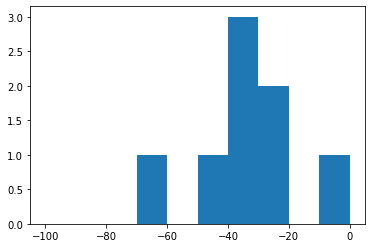

In [36]:
plt.hist(data['Edad'], range = (-100,0));

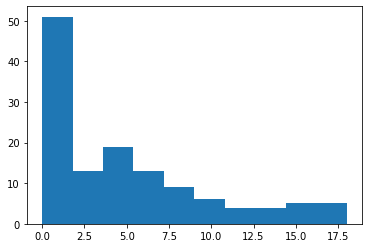

In [37]:
plt.hist(data['Edad'], range = (0,18));

In [38]:
data['Edad'].mean()

52.587354166891366

In [39]:
for i in range(len(data['Edad'])):
    if data.loc[i, 'Edad'] < 18:
        data.loc[i, 'Edad'] = data['Edad'].mean()
    else:
        continue

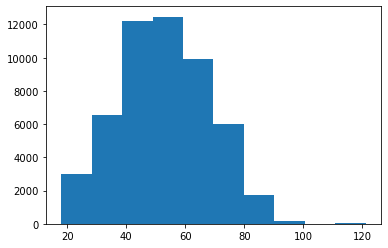

In [40]:
plt.hist(data['Edad']);

In [41]:
# Mapping Edad 
data.loc[data['Edad'] <= 30, 'Rango_Edad'] = "18-30"
data.loc[(data['Edad'] > 30) & (data['Edad'] <= 40), 'Rango_Edad'] = "30-40"
data.loc[(data['Edad'] > 40) & (data['Edad'] <= 50), 'Rango_Edad'] = "40-50"
data.loc[(data['Edad'] > 50) & (data['Edad'] <= 60), 'Rango_Edad'] = "50-60"
data.loc[(data['Edad'] > 60) & (data['Edad'] <= 70), 'Rango_Edad'] = "60-70"
data.loc[(data['Edad'] > 70) & (data['Edad'] <= 80), 'Rango_Edad'] = "70-80"
data.loc[data['Edad'] > 80, 'Rango_Edad'] = "+80"
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT,Edad,Rango_Edad
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,38.060900,-0.950240,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50
1,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,39.588239,-0.502772,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40
2,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,38.154230,-0.749640,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50
3,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,38.212568,-0.682989,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,10,28.641096,18-30
4,2015-01-07,1833687,Normal,SDVFAST,Este,Alicante,3010,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1986-06-18,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,2000,12,TSE,2018-03-31,1,38.366849,-0.487184,N-Tienda- negocio al publico,Financiado,A 0,0+(36*10),0,360,10,0,1,31.805479,30-40


In [42]:
tab1 = pd.crosstab(data["Rango_Edad"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Rango_Edad"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,0,1,All,0,1
Rango_Edad,,,,,
+80,1568,285,1853,0.846195,0.153805
18-30,2453,1202,3655,0.671135,0.328865
30-40,4527,2713,7240,0.625276,0.374724
40-50,8595,3550,12145,0.707699,0.292301
50-60,9564,2397,11961,0.799599,0.200401
60-70,8176,1301,9477,0.862720,0.137280
70-80,5061,639,5700,0.887895,0.112105
All,39944,12087,52031,0.767696,0.232304


Rangos de Income Amount:

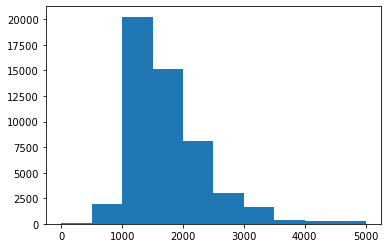

In [43]:
plt.hist(data['Income Amount'], range=(0, 5000));

In [44]:
# Mapping Income Amount
data.loc[data['Income Amount'] <= 1000, 'Income'] = "0-1000"
data.loc[(data['Income Amount'] > 1000) & (data['Income Amount'] <= 1500), 'Income'] = "1000-1500"
data.loc[(data['Income Amount'] > 1500) & (data['Income Amount'] <= 2000), 'Income'] = "1500-2000"
data.loc[(data['Income Amount'] > 2000) & (data['Income Amount'] <= 3000), 'Income'] = "2000-3000"
data.loc[data['Income Amount'] > 3000, 'Income'] = "+3000"
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT,Edad,Rango_Edad,Income
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,38.060900,-0.950240,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50,2000-3000
1,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,39.588239,-0.502772,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40,0-1000
2,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,38.154230,-0.749640,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50,1000-1500
3,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,38.212568,-0.682989,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,10,28.641096,18-30,0-1000
4,2015-01-07,1833687,Normal,SDVFAST,Este,Alicante,3010,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1986-06-18,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,2000,12,TSE,2018-03-31,1,38.366849,-0.487184,N-Tienda- negocio al publico,Financiado,A 0,0+(36*10),0,360,10,0,1,31.805479,30-40,1500-2000


In [45]:
tab1 = pd.crosstab(data["Income"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Income"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,0,1,All,0,1
Income,,,,,
+3000,1633,385,2018,0.809217,0.190783
0-1000,6805,2491,9296,0.732035,0.267965
1000-1500,18031,5409,23440,0.769241,0.230759
1500-2000,9258,2727,11985,0.772466,0.227534
2000-3000,4217,1075,5292,0.796863,0.203137
All,39944,12087,52031,0.767696,0.232304


Días Activo:

In [46]:
# Días hasta el 19/01/2021 si OP y hasta cuando se dio de baja si BAJA

data['Dias_Activo'] = 0
fecha = datetime(2021, 1, 19)

for i in range(len(data['Installation Date'])):
    if data.loc[i, 'Monitoring Status'] == 0:
        data.loc[i,'Dias_Activo'] = (fecha - data.loc[i,'Installation Date']).days
    else:
        data.loc[i,'Dias_Activo'] = (data.loc[i,'Monitoring Status Date'] - data.loc[i,'Installation Date']).days
                        
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT,Edad,Rango_Edad,Income,Dias_Activo
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,38.060900,-0.950240,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50,2000-3000,987
1,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,39.588239,-0.502772,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40,0-1000,1150
2,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,38.154230,-0.749640,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50,1000-1500,2206
3,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,38.212568,-0.682989,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,10,28.641096,18-30,0-1000,1165
4,2015-01-07,1833687,Normal,SDVFAST,Este,Alicante,3010,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1986-06-18,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,2000,12,TSE,2018-03-31,1,38.366849,-0.487184,N-Tienda- negocio al publico,Financiado,A 0,0+(36*10),0,360,10,0,1,31.805479,30-40,1500-2000,1179


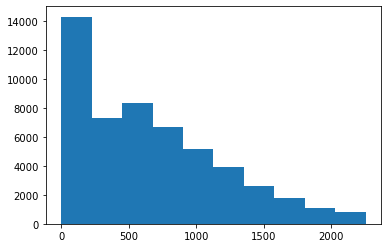

In [47]:
plt.hist(data['Dias_Activo']);

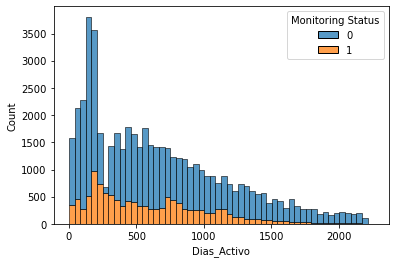

In [48]:
sns.histplot(data = data, x = 'Dias_Activo', hue = 'Monitoring Status', multiple = 'stack')

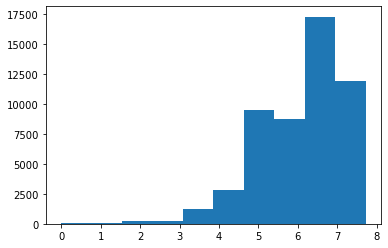

In [49]:
plt.hist(np.log1p(data['Dias_Activo']));

In [50]:
data['Dias_Activo_log'] = np.log1p(data['Dias_Activo'])
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT,Edad,Rango_Edad,Income,Dias_Activo,Dias_Activo_log
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,38.060900,-0.950240,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50,2000-3000,987,6.895683
1,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,39.588239,-0.502772,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40,0-1000,1150,7.048386
2,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,38.154230,-0.749640,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50,1000-1500,2206,7.699389
3,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,38.212568,-0.682989,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,10,28.641096,18-30,0-1000,1165,7.061334
4,2015-01-07,1833687,Normal,SDVFAST,Este,Alicante,3010,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1986-06-18,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,2000,12,TSE,2018-03-31,1,38.366849,-0.487184,N-Tienda- negocio al publico,Financiado,A 0,0+(36*10),0,360,10,0,1,31.805479,30-40,1500-2000,1179,7.073270


In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Dias_Activo_sca'] = scaler.fit_transform(data['Dias_Activo'].values.reshape(-1, 1))
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT,Edad,Rango_Edad,Income,Dias_Activo,Dias_Activo_log,Dias_Activo_sca
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,38.060900,-0.950240,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50,2000-3000,987,6.895683,0.437694
1,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,39.588239,-0.502772,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40,0-1000,1150,7.048386,0.509978
2,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,38.154230,-0.749640,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50,1000-1500,2206,7.699389,0.978271
3,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,38.212568,-0.682989,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,10,28.641096,18-30,0-1000,1165,7.061334,0.516630
4,2015-01-07,1833687,Normal,SDVFAST,Este,Alicante,3010,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1986-06-18,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,2000,12,TSE,2018-03-31,1,38.366849,-0.487184,N-Tienda- negocio al publico,Financiado,A 0,0+(36*10),0,360,10,0,1,31.805479,30-40,1500-2000,1179,7.073270,0.522838


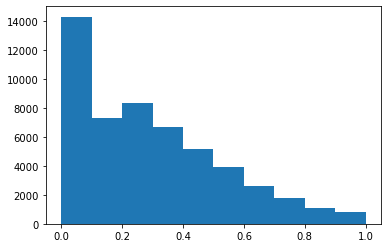

In [52]:
plt.hist(data['Dias_Activo_sca']);

Normalizado de Quejas y Missing Test (MT):

In [53]:
scaler = MinMaxScaler()
data['Quejas_sca'] = scaler.fit_transform(data['Quejas'].values.reshape(-1, 1))
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT,Edad,Rango_Edad,Income,Dias_Activo,Dias_Activo_log,Dias_Activo_sca,Quejas_sca
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,38.060900,-0.950240,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50,2000-3000,987,6.895683,0.437694,0.035714
1,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,39.588239,-0.502772,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40,0-1000,1150,7.048386,0.509978,0.035714
2,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,38.154230,-0.749640,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50,1000-1500,2206,7.699389,0.978271,0.035714
3,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,38.212568,-0.682989,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,10,28.641096,18-30,0-1000,1165,7.061334,0.516630,0.000000
4,2015-01-07,1833687,Normal,SDVFAST,Este,Alicante,3010,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1986-06-18,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,2000,12,TSE,2018-03-31,1,38.366849,-0.487184,N-Tienda- negocio al publico,Financiado,A 0,0+(36*10),0,360,10,0,1,31.805479,30-40,1500-2000,1179,7.073270,0.522838,0.000000


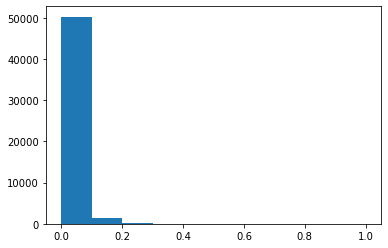

In [54]:
plt.hist(data['Quejas_sca']);

In [55]:
scaler = MinMaxScaler()
data['MT_sca'] = scaler.fit_transform(data['MT'].values.reshape(-1, 1))
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT,Edad,Rango_Edad,Income,Dias_Activo,Dias_Activo_log,Dias_Activo_sca,Quejas_sca,MT_sca
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,38.060900,-0.950240,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50,2000-3000,987,6.895683,0.437694,0.035714,0.000000
1,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,39.588239,-0.502772,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40,0-1000,1150,7.048386,0.509978,0.035714,0.000000
2,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,38.154230,-0.749640,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50,1000-1500,2206,7.699389,0.978271,0.035714,0.000000
3,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,38.212568,-0.682989,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,10,28.641096,18-30,0-1000,1165,7.061334,0.516630,0.000000,0.196078
4,2015-01-07,1833687,Normal,SDVFAST,Este,Alicante,3010,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1986-06-18,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,2000,12,TSE,2018-03-31,1,38.366849,-0.487184,N-Tienda- negocio al publico,Financiado,A 0,0+(36*10),0,360,10,0,1,31.805479,30-40,1500-2000,1179,7.073270,0.522838,0.000000,0.019608


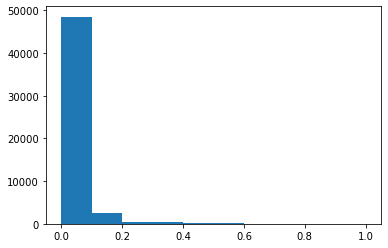

In [56]:
plt.hist(data['MT_sca']);

## Enconding con ``get_dummies``

In [57]:
data.columns

Index(['Installation Date', 'Installation Number', 'Client Type', 'Panel',
       'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality',
       'Country Of Birth', 'Born Date', 'Housing Type', 'Labor Situation',
       'Marital Status', 'Income Amount', 'Number Pay', 'Price List',
       'Monitoring Status Date', 'Monitoring Status', 'Latitude', 'Longitude',
       'Tipo Instalacion', 'Financiado', 'Rango Kit', 'Resumen Precio',
       'Kit Contado', 'Kit Total', 'Kit Mensualidad', 'Quejas', 'MT', 'Edad',
       'Rango_Edad', 'Income', 'Dias_Activo', 'Dias_Activo_log',
       'Dias_Activo_sca', 'Quejas_sca', 'MT_sca'],
      dtype='object')

In [58]:
data_filtered = data[['Gender', 'Housing Type', 'Tipo Instalacion', 'Labor Situation', 'Marital Status', 
                      'Provincia', 'Nationality', 'Rango_Edad', 'Income', 'Rango Kit', 'Number Pay', 'Dias_Activo_sca',
                      'Quejas_sca', 'MT_sca', 'Monitoring Status']]
data_filtered.columns

Index(['Gender', 'Housing Type', 'Tipo Instalacion', 'Labor Situation',
       'Marital Status', 'Provincia', 'Nationality', 'Rango_Edad', 'Income',
       'Rango Kit', 'Number Pay', 'Dias_Activo_sca', 'Quejas_sca', 'MT_sca',
       'Monitoring Status'],
      dtype='object')

In [59]:
Gender = pd.get_dummies(data = data_filtered['Gender'],prefix = "Gender")
House = pd.get_dummies(data = data_filtered['Housing Type'],prefix = "House")
Labor = pd.get_dummies(data = data_filtered['Labor Situation'],prefix = "Labor")
Marital = pd.get_dummies(data = data_filtered['Marital Status'],prefix = "Marital")
Provincia = pd.get_dummies(data = data_filtered['Provincia'],prefix = "Provincia")
Nationality = pd.get_dummies(data = data_filtered['Nationality'],prefix = "Nationality")
Edad = pd.get_dummies(data = data_filtered['Rango_Edad'],prefix = "Rango_Edad")
Income = pd.get_dummies(data = data_filtered['Income'],prefix = "Income")
Kit = pd.get_dummies(data = data_filtered['Rango Kit'],prefix = 'Rango_Kit')
Tipo = pd.get_dummies(data = data_filtered['Tipo Instalacion'],prefix = "Tipo")
N_Pay = pd.get_dummies(data = data_filtered['Number Pay'],prefix = "N_Pay")

In [60]:
data_filtered.drop(['Gender','Housing Type','Labor Situation','Provincia', 'Tipo Instalacion', 'Number Pay',
                    'Nationality', 'Marital Status', 'Rango_Edad', 'Rango Kit', 'Income'],axis=1,inplace=True)

C:\Users\alber\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
dummy_df = pd.concat([data_filtered,Gender,House,Labor,Marital,Provincia,Nationality,Edad,Income,Kit,Tipo,N_Pay],axis=1)
dummy_df.columns

Index(['Dias_Activo_sca', 'Quejas_sca', 'MT_sca', 'Monitoring Status',
       'Gender_H - HOMBRE', 'Gender_M - MUJER',
       'House_1 - PROPIEDAD SIN HIPOTECA', 'House_2 - PROPIEDAD HIPOTECADA',
       'House_3 - ALQUILER', 'House_4 - FAMILIARES/PADRES',
       'House_5 - EMPRESA', 'Labor_01 ASALARIADO FIJO',
       'Labor_02 ASALARIADO TEMPORAL', 'Labor_03 FUNCIONARIO',
       'Labor_04 AUTONOMO', 'Labor_06 PARADO',
       'Labor_07 PENSIONISTA (JUBILACION)', 'Labor_08 PENSIONISTA (VIUDEDAD)',
       'Labor_09 PENSIONISTA (LARGA ENFERMEDAD)', 'Marital_1 - SOLTERO',
       'Marital_2 - CASADO', 'Marital_3 - VIUDO',
       'Marital_4 - SEPARADO/DIVORCIADO', 'Marital_5 ? PAREJA DE HECHO',
       'Marital_5 â PAREJA DE HECHO', 'Provincia_Alicante',
       'Provincia_Castellon', 'Provincia_Valencia',
       'Nationality_AF - AFRICA MENOS MAGREB',
       'Nationality_AJ - AUSTRALIA Y JAPON',
       'Nationality_AS - ASIA MENOS JAPON', 'Nationality_ES - ESPAÃOLA',
       'Nationality_ES 

In [62]:
dummy_df.head()

,Dias_Activo_sca,Quejas_sca,MT_sca,Monitoring Status,Gender_H - HOMBRE,Gender_M - MUJER,House_1 - PROPIEDAD SIN HIPOTECA,House_2 - PROPIEDAD HIPOTECADA,House_3 - ALQUILER,House_4 - FAMILIARES/PADRES,House_5 - EMPRESA,Labor_01 ASALARIADO FIJO,Labor_02 ASALARIADO TEMPORAL,Labor_03 FUNCIONARIO,Labor_04 AUTONOMO,Labor_06 PARADO,Labor_07 PENSIONISTA (JUBILACION),Labor_08 PENSIONISTA (VIUDEDAD),Labor_09 PENSIONISTA (LARGA ENFERMEDAD),Marital_1 - SOLTERO,Marital_2 - CASADO,Marital_3 - VIUDO,Marital_4 - SEPARADO/DIVORCIADO,Marital_5 ? PAREJA DE HECHO,Marital_5 â PAREJA DE HECHO,Provincia_Alicante,Provincia_Castellon,Provincia_Valencia,Nationality_AF - AFRICA MENOS MAGREB,Nationality_AJ - AUSTRALIA Y JAPON,Nationality_AS - ASIA MENOS JAPON,Nationality_ES - ESPAÃOLA,Nationality_ES - ESPAÑOLA,Nationality_IB - IBEROAMERICA,Nationality_MA - MAGREB,Nationality_OT - OTROS,Nationality_RE - RESTO DE EUROPA,Nationality_UE - UNION EUROPEA,Nationality_US - USA / CANADA,Rango_Edad_+80,Rango_Edad_18-30,Rango_Edad_30-40,Rango_Edad_40-50,Rango_Edad_50-60,Rango_Edad_60-70,Rango_Edad_70-80,Income_+3000,Income_0-1000,Income_1000-1500,Income_1500-2000,Income_2000-3000,Rango_Kit_A 0,Rango_Kit_Entre 000-050,Rango_Kit_Entre 050-100,Rango_Kit_Entre 100-200,Rango_Kit_Entre 200-300,Rango_Kit_Mas de 300,Tipo_C-Comunidad de Propietarios,Tipo_N- Oficinas en Altura,"Tipo_N-Bar, Pub, Restaurante",Tipo_N-Casetas de Obra,"Tipo_N-Nave, taller (industrial)","Tipo_N-Oficinas, empresas",Tipo_N-Tienda- negocio al publico,Tipo_P-Apartamento (domicilio particular),Tipo_P-Chalet Pareado,Tipo_P-Chalet adosado,"Tipo_P-Chalet, villa (domicilio particular)",Tipo_P-Coche [OnRoad],N_Pay_12,N_Pay_13,N_Pay_14,N_Pay_15,N_Pay_16
0,0.437694,0.035714,0.000000,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0.509978,0.035714,0.000000,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0.978271,0.035714,0.000000,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0.516630,0.000000,0.196078,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0.522838,0.000000,0.019608,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [63]:
X = dummy_df.drop(['Monitoring Status'],axis=1).values
y = dummy_df['Monitoring Status'].values

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Regresión Logística

Logistic Accuracy is 0.75
Cross Validation Score = 0.73
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      7989
           1       0.47      0.68      0.55      2418

    accuracy                           0.75     10407
   macro avg       0.68      0.72      0.69     10407
weighted avg       0.79      0.75      0.76     10407



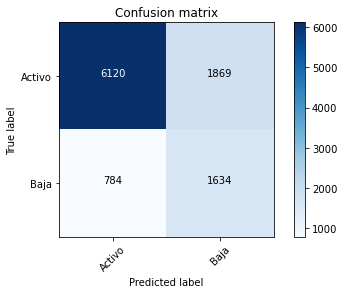

In [65]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state = 0, max_iter=1000, class_weight="balanced")
LR.fit(X_train,y_train) 
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, LR.predict(X_test)))

skf = StratifiedKFold(n_splits=5)
score_LR = cross_val_score(LR, X_test, y_test, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_LR)

y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.79


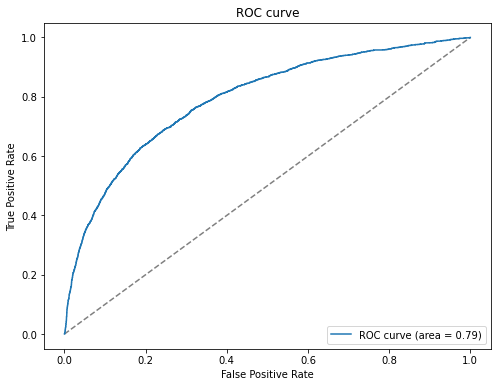

In [66]:
plot_roc_curve(LR, X_test, y_test)

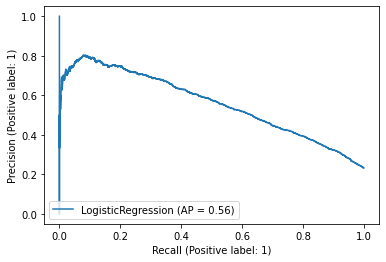

In [67]:
plot_precision_recall_curve(LR, X_test, y_test);

### KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
# Don´t do this!!!

skf = StratifiedKFold(n_splits=5)
knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid = {'n_neighbors':np.arange(3,17,2)},
                      scoring = 'recall', cv = skf)

knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15])},
             scoring='recall')

In [74]:
knn.best_params_

{'n_neighbors': 3}

In [69]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      7989
           1       0.50      0.31      0.39      2418

    accuracy                           0.77     10407
   macro avg       0.66      0.61      0.62     10407
weighted avg       0.74      0.77      0.75     10407



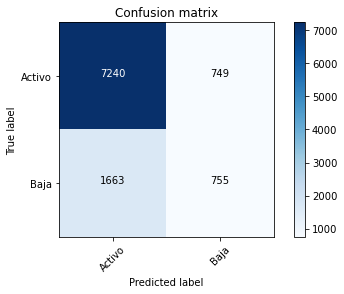

In [71]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test,y_pred))
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.66


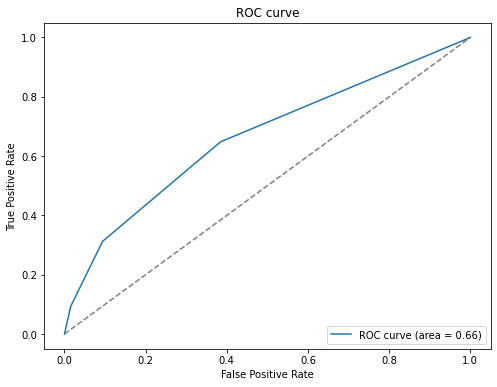

In [72]:
plot_roc_curve(knn, X_test, y_test)

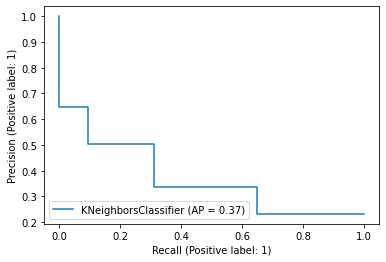

In [73]:
plot_precision_recall_curve(knn, X_test, y_test);

### Decission Tree Classifier

Decision Tree Accuracy is 0.73
Cross Validation Score = 0.73
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      7989
           1       0.45      0.70      0.55      2418

    accuracy                           0.73     10407
   macro avg       0.67      0.72      0.68     10407
weighted avg       0.79      0.73      0.75     10407



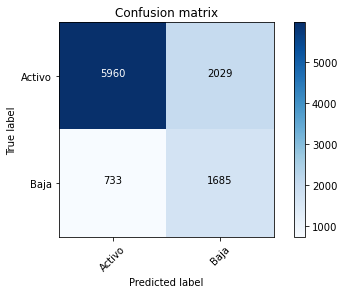

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

DT = DecisionTreeClassifier(random_state = 0,class_weight="balanced", min_weight_fraction_leaf=0.01)
DT = DT.fit(X_train,y_train)
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, DT.predict(X_test)))

skf = StratifiedKFold(n_splits=5)
score_DT = cross_val_score(DT, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_DT)

y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.79


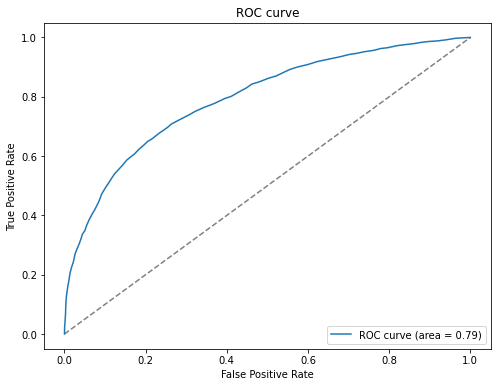

In [75]:
plot_roc_curve(DT, X_test, y_test)

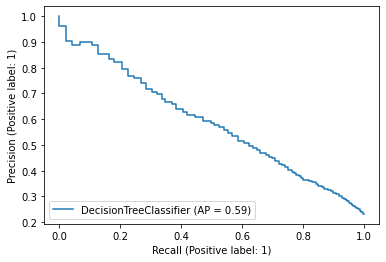

In [76]:
plot_precision_recall_curve(DT, X_test, y_test);

### Random Forest Classifier

Random Forest Accuracy is 0.81
Cross Validation Score = 0.81
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7989
           1       0.60      0.60      0.60      2418

    accuracy                           0.81     10407
   macro avg       0.74      0.74      0.74     10407
weighted avg       0.81      0.81      0.81     10407



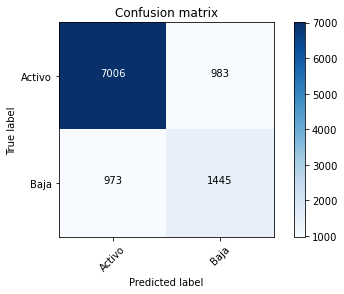

In [77]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train, y_train)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))

skf = StratifiedKFold(n_splits=20)
score_rfc = cross_val_score(rfc, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_rfc)

y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.82


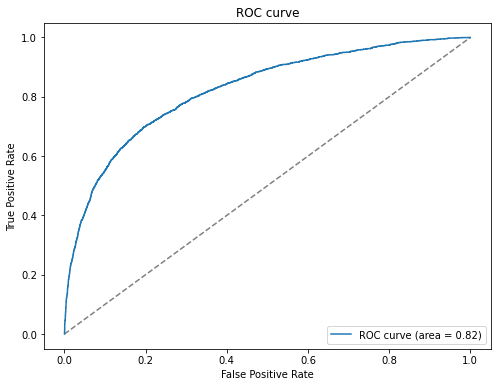

In [78]:
plot_roc_curve(rfc, X_test, y_test)

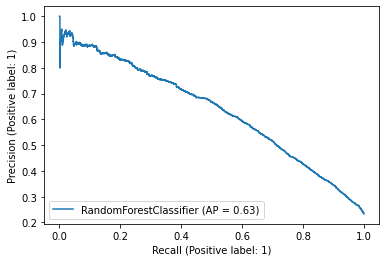

In [79]:
plot_precision_recall_curve(rfc, X_test, y_test);

### XGBoost

GradientBoost Accuracy= 0.84
Cross Validation Score = 0.84
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7989
           1       0.75      0.44      0.55      2418

    accuracy                           0.84     10407
   macro avg       0.80      0.70      0.73     10407
weighted avg       0.83      0.84      0.82     10407



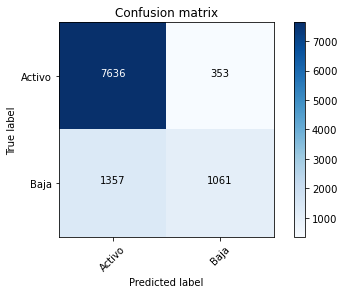

In [80]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000, booster='gbtree', learning_rate=0.01, objective='binary:logistic')
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print ("GradientBoost Accuracy= %2.2f" % accuracy_score(y_test, y_pred))

skf = StratifiedKFold(n_splits=5)
score_xgb = cross_val_score(xgb, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_xgb)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.85


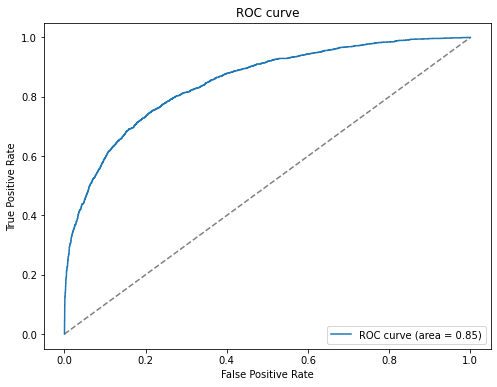

In [81]:
plot_roc_curve(xgb, X_test, y_test)

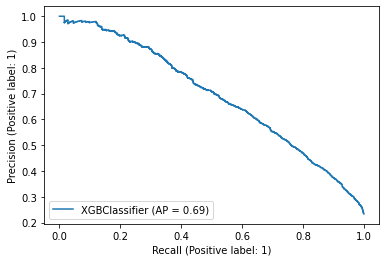

In [82]:
plot_precision_recall_curve(xgb, X_test, y_test);

### Comparing ROC Curves

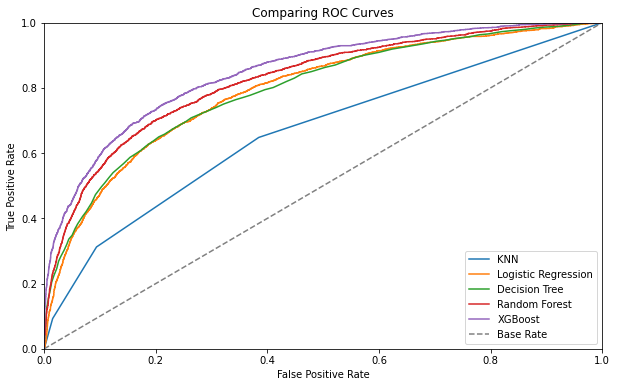

In [83]:
plt.figure(figsize = (10,6), linewidth= 1)

knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])

plt.plot(knn_fpr, knn_tpr, label='KNN' )
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression')
plt.plot(DT_fpr, DT_tpr, label='Decision Tree')
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')

plt.plot([0,1],[0,1],label='Base Rate', ls = '--', c = 'grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Comparing ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Comparing PR Curves

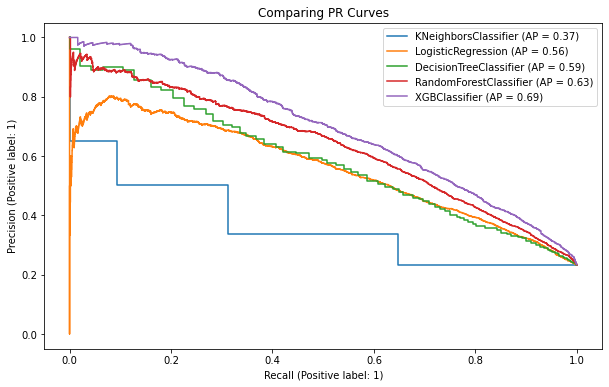

In [84]:
models = [knn, LR, DT, rfc, xgb]

fig, ax = plt.subplots(figsize=(10, 6))
for m in models:
    plot_precision_recall_curve(m, X_test, y_test, ax=ax)
    plt.legend(loc="upper right")
ax.set_title("Comparing PR Curves");

### Feature importances

In [85]:
from sklearn.feature_selection import RFE

# Using Recursive Feature Elimination Function and fitting it in a Logistic Regression Model
modell = LogisticRegression(max_iter=1000, class_weight="balanced")
rfe = RFE(modell, 5)
rfe = rfe.fit(X_train,y_train)
# Displays the feature rank
rfe.ranking_

C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([ 1,  1,  1, 68, 60, 43, 62, 13,  6, 20, 25,  5, 22, 66,  2, 24, 39,
       48, 47, 19, 44, 61, 46,  8, 58, 31, 67, 52, 15, 29, 11, 38, 41,  3,
        7, 37, 53,  4, 51, 27, 12, 16, 59, 40, 30, 49, 45, 63, 65, 57, 50,
       21, 56, 32, 18, 17, 14, 23,  1, 42, 10,  9,  1, 34, 33, 35, 36, 69,
       55, 26, 54, 64, 28])

[2.00536629e-01 7.53466347e-02 7.50072003e-02 1.63471275e-02
 1.63496318e-02 1.36023993e-02 1.10062295e-02 1.23343839e-02
 2.00963234e-03 2.58193448e-03 1.13786063e-02 1.78658373e-03
 3.98080460e-03 1.53597273e-02 3.20791762e-03 6.88997206e-03
 1.25523994e-03 1.44776754e-03 1.27856682e-02 1.27374326e-02
 3.76072347e-03 5.32506608e-03 1.14726929e-03 1.01326301e-04
 1.77780709e-02 1.30756145e-02 1.83223885e-02 5.72409842e-04
 1.90179570e-04 1.92506416e-03 3.67844952e-03 1.50077638e-02
 3.46288369e-03 1.31396974e-03 3.89890681e-03 2.99859227e-03
 1.22582592e-02 1.86486629e-04 3.52137223e-03 8.67578811e-03
 1.62831446e-02 1.39385571e-02 1.32617420e-02 1.12365531e-02
 6.35089200e-03 7.96358740e-03 1.81424140e-02 2.52612761e-02
 2.08950206e-02 1.43088873e-02 1.90492748e-02 1.67199942e-02
 2.02226452e-02 1.43084158e-02 8.87399175e-03 4.80943860e-03
 3.01154013e-05 2.34274579e-04 1.52433457e-02 3.45315856e-05
 8.22771706e-03 5.59466828e-03 2.02224511e-02 1.71365908e-02
 6.23760742e-03 1.060098

C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 147 missing from current font.
  f

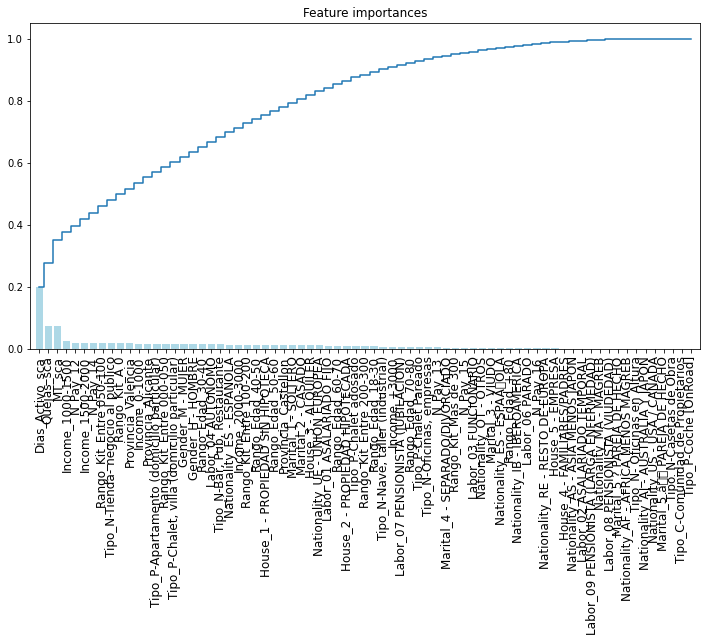

In [86]:
from sklearn.ensemble import ExtraTreesClassifier

# Using ExtraTreesClassifier model function
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

# Printing important features in the model
print(model.feature_importances_)
importances = model.feature_importances_
feat_names = dummy_df.drop(['Monitoring Status'],axis=1).columns

# Displaying the feature importances as a chart by sorting it in the order of importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=12)
plt.xlim([-1, len(indices)])
plt.show()